# 第 6 讲：微分方程

## Euler

对初值问题的两边求积分可以得

$$ \begin{cases}
\frac{dy} {dx} = \int_a^bf(x, y)dx & x \in [a, b]  \\
y(a) = y_0 \\
\end{cases}$$

为了确定唯一解，我们假定$ f(x, y) $关于$ y $满足 **Lipschitz** 条件，即存在实数$ L > 0 $，使得$$ | f(x,y_1) - f(x, y_2) |  \leq L| y1 - y2 | $$

对$ \frac{dy} {dx} = \int_a^bf(x, y)dx $两边同时积分，得$ y_b = y_a + \int_a^bf(x, y)dx $，对于$ \int_a^bf(x, y)dx $，我们使用左矩形公式,得到$ y_b = y_a + (b - a)(f(a, y_0)) $ 

In [1]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def dy(x, y):
    return y - x ** 2 + 1

In [3]:
#dy/dx = f
def Euler_method(y0, n, theta, a, b, f):
    y = np.zeros(n + 1)
    x = np.zeros(n + 1)
    y[0] = y0
    x[0] = a
    h = (b - a) / n
    for i in range(n):
        x[i + 1] = x[i] + h
        y_hat = y[i] + h * f(x[i], y[i])
        y[i + 1] = y[i] + h * (theta * f(x[i], y[i]) + (1 - theta) * y_hat)
    return x, y

In [4]:
y0 = 0.5
xsvalues, ysvalues = Euler_method(y0, 4, 1, 0, 2, dy)
xsvalues, ysvalues_Trapezoidal = Euler_method(y0, 4, 1/2, 0, 2, dy)
xsvalues, ysvalues_behind = Euler_method(y0, 4, 1, 0, 2, dy)
print(ysvalues_behind)

[0.5    1.25   2.25   3.375  4.4375]


In [5]:
x = sp.symbols('x')
y = sp.Function('y')
con = {y(0): 0.5}
func = sp.dsolve(sp.Derivative(y(x),x, 1) - y(x) + x ** 2 - 1, ics = con)
ysreal = []
for xs in xsvalues:
    ysreal.append(list(sp.solve(func.evalf(subs = {'x': xs}))[0].values()))
ysreal

[[0.500000000000000],
 [1.42563936464994],
 [2.64085908577048],
 [4.00915546483097],
 [5.30547195053467]]

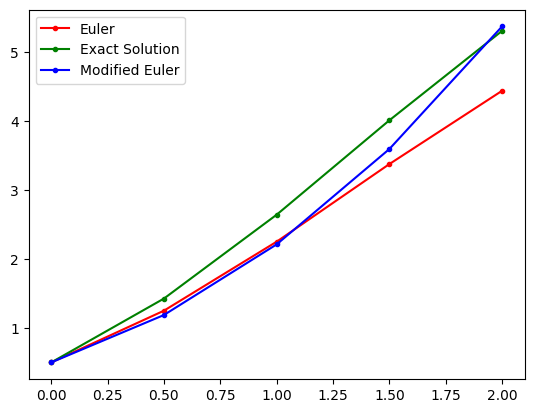

In [6]:
plt.plot(xsvalues, ysvalues, 'r.-', label = "Euler")
plt.plot(xsvalues, ysreal, 'g.-',label = "Exact Solution")
plt.plot(xsvalues, ysvalues_Trapezoidal, 'b.-',label = "Modified Euler")
plt.legend()

## Runge-Kutta

Runge-Kutta法既有Taylor法一样的高阶局部截断误差，又不需要计算$f(x, y)$的导数值

在单步法中，我们需要做近似计算$$ y(x_{k+1}) = y(x_k) + h_k \int_{x_k}^{x_{k+1}}f(x, y)dx $$

为了获得更高的精度，我们考虑使用下面更高代数精度的求积公式$$ \int_{x_k}^{x_{k+1}}f(x, y)dx = h_k\sum_{i = 1}^r a_i f(x_k + h_k\lambda_i, y(x_k + h_k\lambda_i))$$

其中$a_i$为积分系数。

我们规定一开始的$ \lambda_1 $为0，那么上面的求和公式中的展开式右端第一项就是$ f(x_k, y_k) $，将其记作$ \mathit{K_1} $

In [7]:
def RK4(f, x0, y0, h, n):
    y = [y0]
    x = [x0]
    for i in range(n):
        k1 = h * f(x[-1], y[-1])
        k2 = h * f(x[-1] + h/2, y[-1] + k1/2)
        k3 = h * f(x[-1] + h/2, y[-1] + k2/2)
        k4 = h * f(x[-1] + h, y[-1] + k3)

        xi = x[-1] + h
        yi = y[-1] + (k1 + 2*k2 + 2*k3 + k4)/6

        x.append(xi)
        y.append(yi)

    return x, y

In [8]:
a = 0
b = 2
y0 = 0.5
n = 4
h = (b - a) / n

xsvalues, ysvalues_RK = RK4(dy, a, y0, h, n)
ysvalues_RK

[0.5,
 1.4251302083333335,
 2.6396026611328125,
 4.006818970044454,
 5.301605229265987]

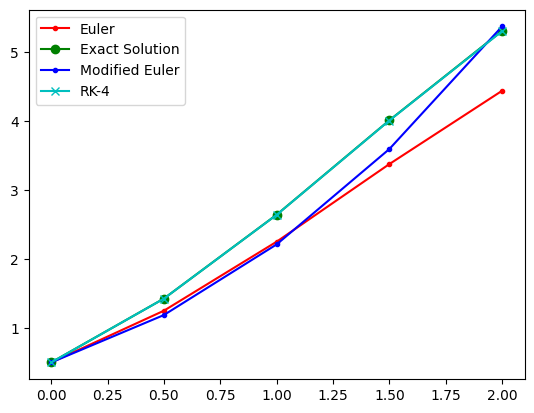

In [9]:
plt.plot(xsvalues, ysvalues, 'r.-', label = "Euler")
plt.plot(xsvalues, ysreal, 'go-',label = "Exact Solution")
plt.plot(xsvalues, ysvalues_Trapezoidal, 'b.-',label = "Modified Euler")
plt.plot(xsvalues, ysvalues_RK, 'cx-', label = "RK-4")
plt.legend()

可以明显看出RK4法计算出来的数值解几乎与精确解保持一致

## 偏微分方程
偏微分方程（缩写作PDE）指含有未知函数及其偏导数的方程。描述自变量、未知函数及其偏导数之间的关系。符合这个关系的函数是方程的解。

偏微分方程分为线性偏微分方程式与非线性偏微分方程式，常常有几个解而且涉及额外的边界条件。

## 抛物型方程

问题描述

在用x方向和t方向的步长分别为h和k的网格上，求解抛物型偏微分方程$$ \frac {\partial{u}}{\partial{t}} = \alpha^2 \frac{\partial^2 u}{\partial t^2}(x, t) $$ 并且令 $ \lambda = \frac{a^2k}{h^2} $.

假设 $ a = l = 1 $，且对于 $ t>  0 $ 有 $ u(0,t) = u(1,t)=0 $，对于 $ 0 \leq x \leq 1 $ 有 $ u(x, 0) = sin(\pi x) = f(x)$．写出当$ h=0.2 $和$ k=0.01 $时，求解 $ t=0.5 $ 时刻的结果.

## forward

In [10]:
def f(x):
    return np.sin(np.pi*x)

In [11]:
def forward_finite_diff(a, l, t, h, k, f):
    N = int(l / h)
    M = int(t / k)
    lamb = (a ** 2 * k) / (h ** 2)
    x = np.linspace(0, l, N+1)
    t = np.linspace(0, t, M+1)
    u = np.zeros((M, N + 1))
    u[0, :] = f(x)

    A = np.zeros((N+1, N+1))
    A[0, 0] = 0
    A[N, N] = 0
    for i in range(1, N):
        A[i, i-1] = lamb
        A[i, i] = 1 - 2*lamb
        A[i, i+1] = lamb
    for j in range(M - 1):
        u[j + 1] = np.dot(A, u[j, :])
    return x, u

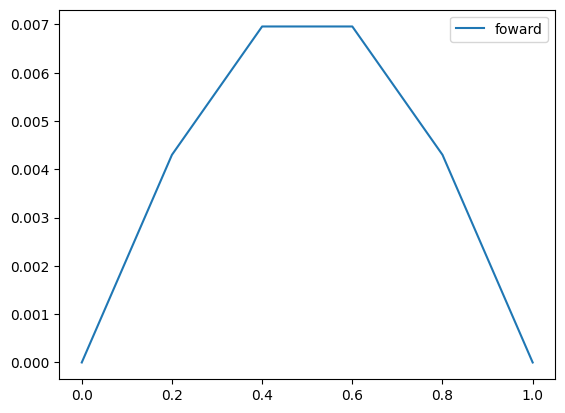

In [12]:
xsvalues, u = forward_finite_diff(1, 1, 0.5, 0.2, 0.01, f)
plt.plot(xsvalues, u[-1], label = "foward")
plt.legend()

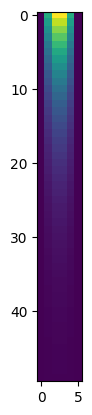

In [13]:
plt.imshow(u)
plt.show()

## backward

In [14]:
def backward_finite_diff(a, l, t, h, k, f):
    N = int(l / h)
    M = int(t / k)

    lamb = (a ** 2 * k) / (h ** 2)
    x = np.linspace(0, l, N+1)
    t = np.linspace(0, t, M+1)
    u = np.zeros((M, N + 1))
    u[0, :] = f(x)

    A = np.zeros((N+1, N+1))
    A[0, 0] = 1
    A[N, N] = 1
    
    for i in range(1, N):
        A[i, i-1] = -lamb
        A[i, i] = (1 + 2*lamb)
        A[i, i+1] = -lamb

    for k in range(M - 1):
        u[k+1] = np.linalg.solve(A, u[k])
    return x, u

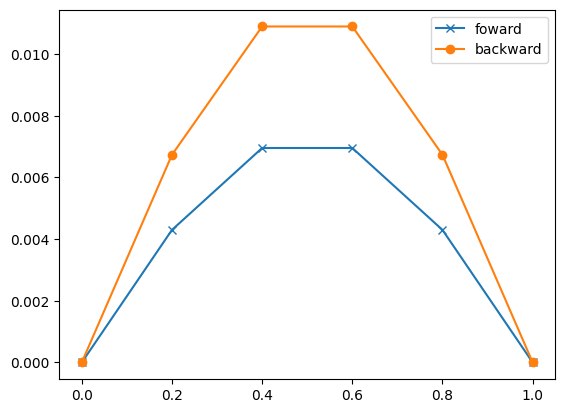

In [15]:
a = 1
l = 1
t = 0.5
h = 0.2
k = 0.01

xsvalues, u = forward_finite_diff(a, l, t, h, k, f)
xsvalues, u_back = backward_finite_diff(a, l, t, h, k, f)
plt.plot(xsvalues, u[-1], 'x-', label = "foward")
plt.plot(xsvalues, u_back[-1], 'o-', label = "backward")
plt.legend()

## CN

In [16]:
def crank_nicolson(a, l, t, h, k, f):
    N = int(l / h)
    M = int(t / k)

    lamb = (a ** 2 * k) / (2 * h ** 2)
    x = np.linspace(0, l, N+1)
    t = np.linspace(0, t, M+1)
    u = np.zeros((M+1, N + 1))
    u[0, :] = f(x)
    # 构建三对角矩阵
    main_diag = np.zeros(N+1)
    main_diag[0] = 1
    main_diag[N] = 1

    sub_diag = np.zeros(N)
    sup_diag = np.zeros(N)

    for i in range(1, N):
        sub_diag[i-1] = -lamb / 2
        main_diag[i] = 1 + lamb
        sup_diag[i] = -lamb / 2

    for n in range(M):
        B = np.zeros(N+1)
        B[0] = u[n, 0]
        B[N] = u[n, N]

        for i in range(1, N):
            B[i] = lamb / 2 * u[n, i-1] + (1 - lamb) * u[n, i] + lamb / 2 * u[n, i+1]

        u[n+1, :] = solve_tridiagonal(sub_diag, main_diag, sup_diag, B)

    return x, t, u

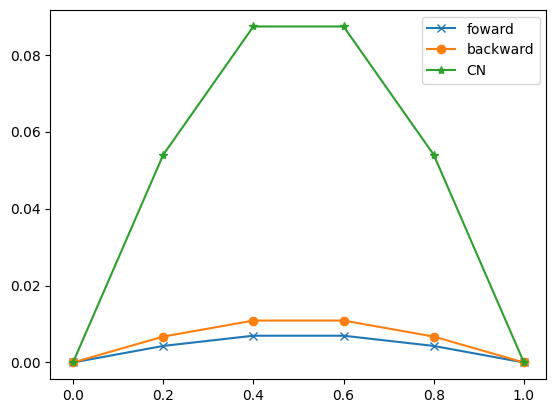

In [17]:
# Thomas算法
def solve_tridiagonal(a, b, c, d):
    n = len(d)
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n)

    c_dash[0] = c[0] / b[0]
    d_dash[0] = d[0] / b[0]

    for i in range(1, n-1):
        c_dash[i] = c[i] / (b[i] - a[i-1] * c_dash[i-1])

    for i in range(1, n):
        d_dash[i] = (d[i] - a[i-1] * d_dash[i-1]) / (b[i] - a[i-1] * c_dash[i-1])

    x = np.zeros(n)
    x[n-1] = d_dash[n-1]

    for i in range(n-2, -1, -1):
        x[i] = d_dash[i] - c_dash[i] * x[i+1]

    return x

a = 1.0
l = 1.0
t = 0.5
h = 0.2
k = 0.01

xsvalues, u = forward_finite_diff(a, l, t, h, k, f)
xsvalues, u_back = backward_finite_diff(a, l, t, h, k, f)
xsvalues, t, u_cn = crank_nicolson(a, l, t, h, k, f)

plt.plot(xsvalues, u[-1], 'x-', label = "foward")
plt.plot(xsvalues, u_back[-1], 'o-', label = "backward")
plt.plot(xsvalues, u_cn[-1], '*-', label = "CN")
plt.legend()

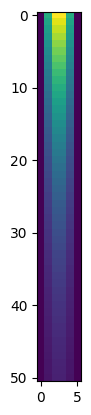

In [18]:
plt.imshow(u_cn)
plt.show()